In [57]:
import mlflow
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact

import sys
import glob
sys.path.append('../')

from src import ROOT_PATH
import matplotlib.pyplot as plt 
# %matplotlib notebook

mlflow.set_tracking_uri('http://127.0.0.1:5000')
experiment_id = 1 #FixMatch
run_id = '3e38006e46d14d6abb828c34ce6dc58b'

In [58]:
run = mlflow.get_run(run_id)

In [59]:
threshold = float(run.data.params['model/threshold'])
threshold

0.95

In [60]:
artifacts_path = ROOT_PATH + '/' + '/'.join(run.info.artifact_uri.split('/')[-4:]) 
dfs_paths = glob.glob(artifacts_path + '/*')
artifacts_path

'/home/ubuntu/semi_supervised_certain_pseudo_labeling/mlruns/1/3e38006e46d14d6abb828c34ce6dc58b/artifacts'

In [63]:
dfs = []
for df_path in dfs_paths:
    dfs.append(pd.read_csv(df_path))
df = pd.concat(dfs[::-1], ignore_index=True)
df.correctness = df.correctness.astype(int)

In [64]:
df

,image_id,score,correctness,epoch
0,39887,0.693254,0,3001
1,44456,0.945633,0,3001
2,20117,0.675025,1,3001
3,25199,0.999686,1,3001
4,31665,0.904779,0,3001
...,...,...,...,...
5375995,28222,0.577053,1,2000
5375996,6517,0.637290,0,2000
5375997,8196,0.673123,1,2000
5375998,32248,0.527918,0,2000


Text(0, 0.5, 'accuracy of pseudo-label')

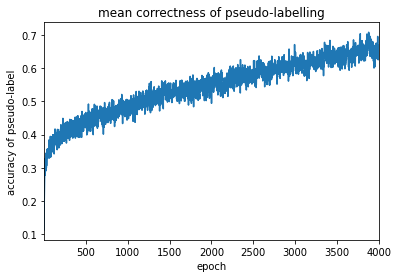

In [65]:
df.groupby('epoch').correctness.mean().plot.line()
plt.title('mean correctness of pseudo-labelling')
plt.ylabel('accuracy of pseudo-label')

In [66]:
df.groupby('image_id').size().describe()

count    44750.000000
mean       120.134078
std         10.868806
min         78.000000
25%        113.000000
50%        120.000000
75%        127.000000
max        178.000000
dtype: float64

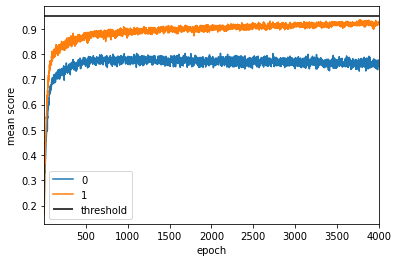

In [68]:
df.groupby(['epoch', 'correctness']).mean().score.unstack(level=1).plot.line()
plt.ylabel('mean score')
plt.hlines(y=threshold, xmin=0, xmax=4000, label='threshold')
plt.legend()

In [69]:
def plot_func(epoch):
    df[df.epoch == epoch].groupby('correctness').score.plot.hist(bins=50, alpha=0.7)
    plt.legend()
    
interact(plot_func, epoch = widgets.IntSlider(value=1, min=1, max=4000, step=1, continuous_update=False))

interactive(children=(IntSlider(value=1, continuous_update=False, description='epoch', max=4000, min=1), Outpu…

<function __main__.plot_func(epoch)>

Text(0, 0.5, 'accuracy of pseudo-label')

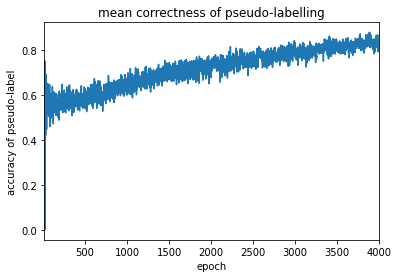

In [70]:
df[df.score > threshold].groupby('epoch').correctness.mean().plot.line()
plt.title('mean correctness of pseudo-labelling')
plt.ylabel('accuracy of pseudo-label')